<a href="https://colab.research.google.com/github/mlbrilliance/Ant-Colony-Optimization-ACO-for-Traveling-Salesman-Problem/blob/main/Ant_Colony_Optimization_(ACO)_for_Traveling_Salesman_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ant Colony Optimization (ACO) for Traveling Salesman Problem

--------------------------------------------------------------------------------

### This notebook implements an Ant Colony Optimization algorithm to solve the Traveling Salesman Problem (TSP). The implementation includes visualization tools to help understand the solution process and final results.

Author: Nick Sudh

--------------------------------------------------------------------------------

Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Distance calculation function

In [2]:
def distance(city1, city2):
    """Calculate Euclidean distance between two cities"""
    return np.linalg.norm(city1 - city2)


City selection function using roulette wheel selection

In [3]:
def select_next_city(current_city, unvisited, pheromone, distances, alpha, beta):
    """Select next city using roulette wheel selection"""
    if len(unvisited) == 0:
        return None

    pheromone_values = np.array([pheromone[current_city][j] for j in unvisited])
    distance_values = np.array([distances[current_city][j] for j in unvisited])

    # Avoid division by zero
    distance_values = np.where(distance_values == 0, 1e-10, distance_values)

    # Calculate probabilities
    probabilities = (pheromone_values ** alpha) * ((1.0 / distance_values) ** beta)
    probabilities = probabilities / probabilities.sum()

    # Select next city
    return np.random.choice(unvisited, p=probabilities)

Main ACO Algorithm
The following cell contains the main ACO algorithm implementation for solving TSP.

In [4]:
def solve_tsp_with_aco(cities, num_ants=10, num_iterations=100, alpha=1.0, beta=5.0, rho=0.5):
    """Main ACO algorithm for solving TSP"""
    num_cities = len(cities)

    # Calculate distances between all cities
    distances = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            distances[i][j] = distance(cities[i], cities[j])

    # Initialize pheromone trails
    pheromone = np.ones((num_cities, num_cities))

    best_route = None
    best_distance = float('inf')
    history = []

    for iteration in range(num_iterations):
        # Store all ant routes and their distances
        ant_routes = []
        ant_distances = []

        # Each ant constructs a route
        for ant in range(num_ants):
            current_city = np.random.randint(num_cities)
            route = [current_city]
            unvisited = set(range(num_cities)) - {current_city}

            # Construct route
            while unvisited:
                next_city = select_next_city(current_city, list(unvisited), pheromone,
                                           distances, alpha, beta)
                route.append(next_city)
                unvisited.remove(next_city)
                current_city = next_city

            # Calculate route distance
            route_distance = sum(distances[route[i]][route[i-1]]
                               for i in range(len(route)))
            route_distance += distances[route[-1]][route[0]]  # Return to start

            ant_routes.append(route)
            ant_distances.append(route_distance)

            # Update best route if better
            if route_distance < best_distance:
                best_distance = route_distance
                best_route = route.copy()

        # Store best distance for history
        history.append(best_distance)

        # Evaporate pheromone
        pheromone *= (1.0 - rho)

        # Deposit new pheromone
        for route, route_distance in zip(ant_routes, ant_distances):
            for i in range(len(route)):
                j = (i + 1) % len(route)
                pheromone[route[i]][route[j]] += 1.0 / route_distance
                pheromone[route[j]][route[i]] += 1.0 / route_distance

    return best_route, best_distance, history

Visualization Functions

These functions help visualize the results of the ACO algorithm.

In [5]:
# Function to plot the route
def plot_route(cities, route, distance):
    """Plot the cities and the route"""
    plt.figure(figsize=(10, 10))

    # Plot cities
    plt.scatter(cities[:, 0], cities[:, 1], c='red', s=100)

    # Plot route
    route_coords = np.array([cities[i] for i in route + [route[0]]])
    plt.plot(route_coords[:, 0], route_coords[:, 1], 'b-')

    # Label cities
    for i, city in enumerate(cities):
        plt.annotate(f'City {i}', (city[0], city[1]), xytext=(5, 5),
                    textcoords='offset points')

    plt.title(f'Best Route (Total Distance: {distance:.2f})')
    plt.grid(True)
    plt.show()

Function to plot convergence history

In [6]:
def plot_convergence(history):
    """Plot the convergence history"""
    plt.figure(figsize=(10, 5))
    plt.plot(history)
    plt.title('Convergence History')
    plt.xlabel('Iteration')
    plt.ylabel('Best Distance')
    plt.grid(True)
    plt.show()

Let's run the algorithm with some random cities and visualize the results.


In [7]:
# Set random seed for reproducibility
np.random.seed(42)

Generate random cities

In [8]:
num_cities = 10
cities = np.random.rand(num_cities, 2) * 100

Solve TSP using ACO

In [9]:
best_route, best_distance, history = solve_tsp_with_aco(
    cities,
    num_ants=20,          # Number of ants in the colony
    num_iterations=100,   # Number of iterations
    alpha=1.0,           # Influence of pheromone trails
    beta=5.0,           # Influence of distances
    rho=0.5            # Pheromone evaporation rate
)

Print results

In [10]:
print(f"Best Route: {best_route}")
print(f"Best Distance: {best_distance:.2f}")

Best Route: [1, 6, 9, 7, 2, 8, 3, 5, 0, 4]
Best Distance: 307.37


Plot results

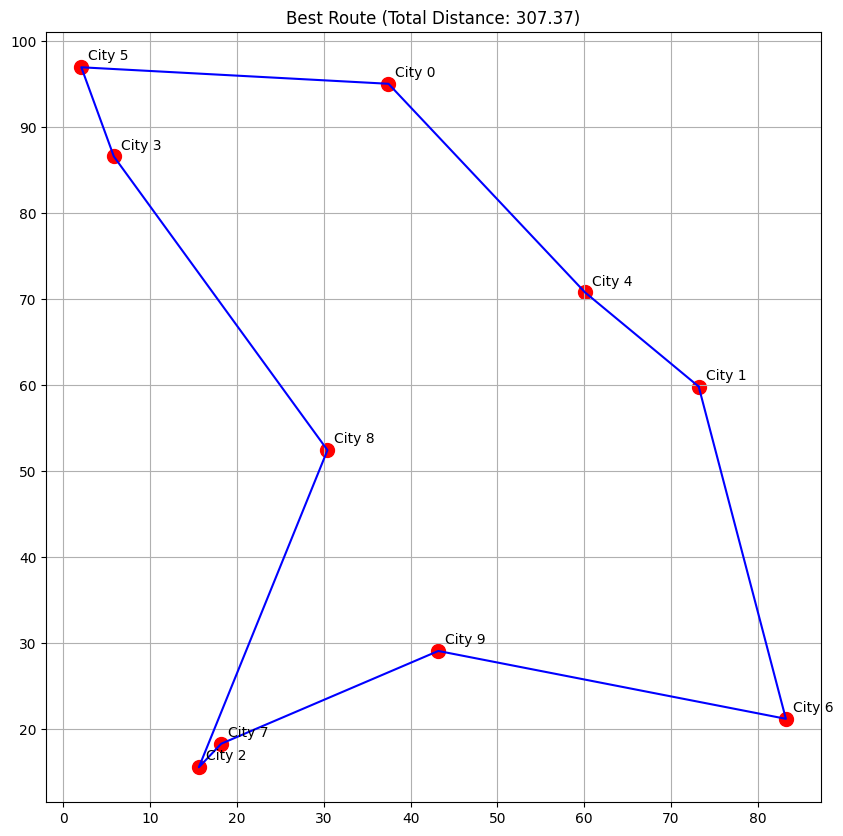

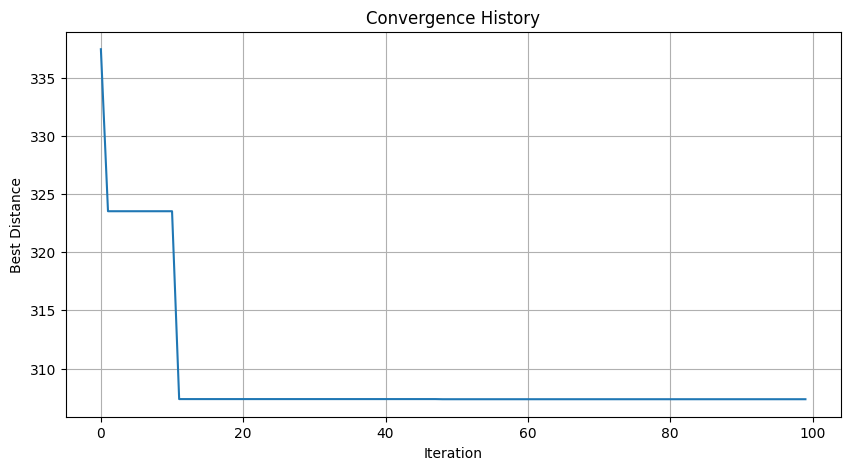

In [11]:
plot_route(cities, best_route, best_distance)
plot_convergence(history)

Try Different Parameters

You can experiment with different parameters to see how they affect the solution:

- Increase `num_ants` for more thorough exploration
- Increase `num_iterations` for potentially better solutions
- Adjust `alpha` to change the influence of pheromone trails
- Adjust `beta` to change the influence of distances
- Modify `rho` to control how quickly old paths are forgotten

Try modifying the parameters in the cell above and run it again to see the effects!